In [1]:
import urllib.request as req
import json
import pandas as pd

Pre-loaded historical data (for comparison):

In [2]:
with open('../../../data/sao-paulo/training-sets/weather/weather-201812.json') as f:
    text = f.read()

data = json.loads(text)
df = pd.DataFrame(data['observations'])
df.head()

blunt_phrase        class clds day_ind  dewPt  expire_time_gmt  feels_like  \
0         None  observation  SCT       D     17       1543658400          20   
1         None  observation  OVC       D     18       1543662000          20   
2         None  observation  CLR       D     18       1543665600          20   
3         None  observation  SCT       D     17       1543669200          21   
4         None  observation  FEW       D     18       1543672800          22   

   gust  heat_index  icon_extd  ... uv_index valid_time_gmt vis water_temp  \
0   NaN          20       1201  ...        0     1543651200   9       None   
1   NaN          20       1201  ...        0     1543654800   9       None   
2   NaN          20       1201  ...        1     1543658400   9       None   
3   NaN          21       3000  ...        3     1543662000   9       None   
4   NaN          22       3400  ...        6     1543665600   9       None   

     wc   wdir wdir_cardinal  wspd wx_icon      wx_phrase  
0  20.0  290.0           WNW   9.0      11     Light Rain  
1  20.0  300.0           WNW  11.0      11     Light Rain  
2  20.0    NaN          CALM   0.0      11     Light Rain  
3  21.0  350.0             N   7.0      30  Partly Cloudy  
4  22.0  330.0           NNW  11.0      34           Fair  

[5 rows x 45 columns]

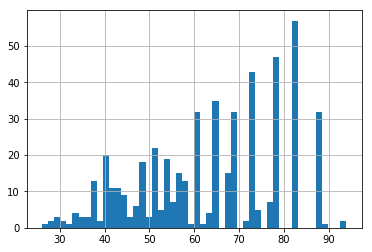

In [5]:
df.rh.hist(bins=50)

Hourly forecast

In [6]:
api_key = '6532d6454b8aa370768e63d6ba5a832e'
url = 'https://api.weather.com/v1/geocode/-23.5489/-46.6388/forecast/hourly/360hour.json' + \
      '?apiKey=' + api_key + \
      '&units=m'
result_daily = json.loads(req.urlopen(url).read().decode())
result_daily

{'forecasts': [{'class': 'fod_short_range_hourly',
   'clds': 29,
   'day_ind': 'D',
   'dewpt': 12,
   'dow': 'Wednesday',
   'expire_time_gmt': 1563991744,
   'fcst_valid': 1563991200,
   'fcst_valid_local': '2019-07-24T15:00:00-0300',
   'feels_like': 27,
   'golf_category': 'Very Good',
   'golf_index': 9,
   'gust': None,
   'hi': 27,
   'icon_code': 34,
   'icon_extd': 3400,
   'mslp': 1017.7,
   'num': 1,
   'phrase_12char': 'M Sunny',
   'phrase_22char': 'Mostly Sunny',
   'phrase_32char': 'Mostly Sunny',
   'pop': 0,
   'precip_type': 'rain',
   'qpf': 0.0,
   'rh': 40,
   'severity': 1,
   'snow_qpf': 0.0,
   'subphrase_pt1': 'Mostly',
   'subphrase_pt2': 'Sunny',
   'subphrase_pt3': '',
   'temp': 26,
   'uv_desc': 'Low',
   'uv_index': 2,
   'uv_index_raw': 2.35,
   'uv_warning': 0,
   'vis': 16.0,
   'wc': 26,
   'wdir': 292,
   'wdir_cardinal': 'WNW',
   'wspd': 8,
   'wxman': 'wx1000'},
  {'class': 'fod_short_range_hourly',
   'clds': 25,
   'day_ind': 'D',
   'dewpt': 1

In [7]:
len(result_daily['forecasts'])

360

In [8]:
for i in result_daily['forecasts'][0]:
    print(i)

pop
feels_like
hi
wspd
precip_type
vis
golf_category
uv_warning
subphrase_pt1
fcst_valid_local
phrase_12char
subphrase_pt2
icon_code
temp
class
uv_index_raw
expire_time_gmt
day_ind
gust
phrase_32char
wxman
clds
fcst_valid
dewpt
rh
mslp
wdir
qpf
subphrase_pt3
golf_index
wdir_cardinal
severity
snow_qpf
dow
phrase_22char
uv_index
wc
uv_desc
icon_extd
num


In [9]:
cont = 0
total = 0
for i in result_daily['forecasts'][0]:
    if i in df.columns: 
        cont += 1
        print(i)
    total += 1
cont, total

feels_like
wspd
vis
temp
class
expire_time_gmt
day_ind
gust
clds
rh
wdir
wdir_cardinal
uv_index
wc
uv_desc
icon_extd


(16, 40)

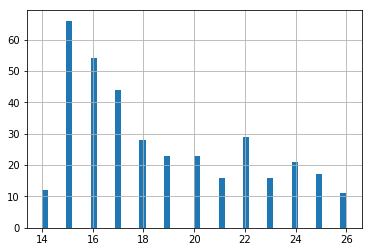

In [11]:
pd.DataFrame(result_daily['forecasts']).temp.hist(bins=50)

Daily forecast

In [12]:
url = 'https://api.weather.com/v1/geocode/-23.5489/-46.6388/forecast/daily/3day.json' + \
      '?apiKey=' + api_key + \
      '&units=m'
result = json.loads(req.urlopen(url).read().decode())
result

{'forecasts': [{'blurb': None,
   'blurb_author': None,
   'class': 'fod_long_range_daily',
   'dow': 'Wednesday',
   'expire_time_gmt': 1563993218,
   'fcst_valid': 1563962400,
   'fcst_valid_local': '2019-07-24T07:00:00-0300',
   'lunar_phase': 'Last Quarter',
   'lunar_phase_code': 'LQ',
   'lunar_phase_day': 22,
   'max_temp': None,
   'min_temp': 14,
   'moonrise': '',
   'moonset': '2019-07-24T11:33:50-0300',
   'narrative': 'Mostly clear. Low 14C.',
   'night': {'accumulation_phrase': '',
    'alt_daypart_name': 'Tonight',
    'clds': 18,
    'day_ind': 'N',
    'daypart_name': 'Tonight',
    'fcst_valid': 1564005600,
    'fcst_valid_local': '2019-07-24T19:00:00-0300',
    'golf_category': '',
    'golf_index': None,
    'hi': 26,
    'icon_code': 33,
    'icon_extd': 3300,
    'long_daypart_name': 'Wednesday night',
    'narrative': 'A few passing clouds. Low 14C. Winds light and variable.',
    'num': 1,
    'phrase_12char': 'M Clear',
    'phrase_22char': 'Mostly Clear',
    

In [13]:
cont = 0
total = 0
for i in result['forecasts'][0]:
    if i in df.columns: 
        cont += 1
        print(i)
    total += 1
cont, total

qualifier
class
expire_time_gmt
max_temp
min_temp


(5, 28)

Intraday forecast

In [14]:
url = 'https://api.weather.com/v1/geocode/-23.5489/-46.6388/forecast/intraday/3day.json' + \
      '?apiKey=' + api_key + \
      '&units=m'
result = json.loads(req.urlopen(url).read().decode())
result

{'forecasts': [{'class': 'fod_long_range_intraday',
   'clds': 14,
   'daypart_name': 'Evening',
   'dow': 'Wednesday',
   'expire_time_gmt': 1563993254,
   'fcst_valid': 1564005600,
   'fcst_valid_local': '2019-07-24T19:00:00-0300',
   'icon_code': 33,
   'icon_extd': 3300,
   'num': 1,
   'phrase_12char': 'M Clear',
   'phrase_22char': 'Mostly Clear',
   'phrase_32char': 'Mostly Clear',
   'pop': 5,
   'precip_type': 'rain',
   'qualifier': None,
   'qualifier_code': None,
   'rh': 61,
   'subphrase_pt1': 'Mostly',
   'subphrase_pt2': 'Clear',
   'subphrase_pt3': '',
   'temp': 21,
   'wdir': 146,
   'wdir_cardinal': 'SE',
   'wspd': 7},
  {'class': 'fod_long_range_intraday',
   'clds': 25,
   'daypart_name': 'Overnight',
   'dow': 'Thursday',
   'expire_time_gmt': 1563993254,
   'fcst_valid': 1564027200,
   'fcst_valid_local': '2019-07-25T01:00:00-0300',
   'icon_code': 29,
   'icon_extd': 2900,
   'num': 2,
   'phrase_12char': 'P Cloudy',
   'phrase_22char': 'Partly Cloudy',
   'ph

In [15]:
cont = 0
total = 0
for i in result['forecasts'][0]:
    if i in df.columns: 
        cont += 1
        print(i)
    total += 1
cont, total

qualifier
wspd
rh
temp
class
expire_time_gmt
clds
wdir
wdir_cardinal
icon_extd


(10, 25)